In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

globalterrorismdb_0617dist.csv



In [81]:
df = pd.read_csv("../input/globalterrorismdb_0617dist.csv",encoding='ISO-8859-1')
df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


(18, 135)

# Countries with highest terrorism attacks.

_____

In [67]:
df['country_txt'].value_counts().head(12)

Iraq              22130
Pakistan          13634
Afghanistan       11306
India             10978
Colombia           8163
Philippines        6212
Peru               6088
El Salvador        5320
United Kingdom     5098
Turkey             4106
Thailand           3668
Somalia            3482
Name: country_txt, dtype: int64

* # Be more careful during these months

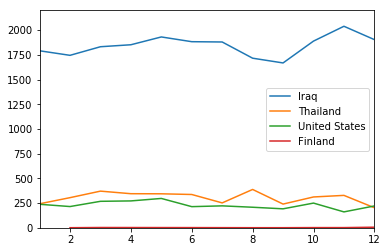

In [86]:
def monthlyCrime(countryNames):
    for countryName in countryNames:
        monthCount = df[df['country_txt']==countryName]['imonth'].value_counts()
        monthCount.sort_index().plot(ylim=(0,2200),legend=True,label=countryName)
monthlyCrime(['Iraq','Thailand','United States','Finland'])
# During Chrismas, New Year, you should be more careful in Iraq
# For Thailand, be careful on August
# For US, no clear patterns.

## Be more careful around these cities
___

In [99]:
def crimeByCity(countryName):
    return df[df['country_txt']==countryName]['city'].value_counts().head(10)

In [100]:
crimeByCity('Iraq')
# We can say that Baghdad is the most terrorist attraction (pun intended)
# Maybe because it is the capital city so it has a lot more crime compare to other

Baghdad         7204
Mosul           1775
Kirkuk           887
Baqubah          725
Fallujah         561
Unknown          495
Ramadi           482
Tikrit           398
Abu Ghraib       290
Tuz Khormato     268
Name: city, dtype: int64

In [101]:
crimeByCity('Thailand')
# Many cities with high crime rates, different from Iraq where most crime occur in one city.

Unknown         247
Bangkok         212
Yala            131
Muang           115
Bannang Sata     66
Pattani          66
Sungai Kolok     59
Narathiwat       54
Yarang           51
Raman            51
Name: city, dtype: int64

In [102]:
crimeByCity('United States')
# Similar to Iraq in which the cpaital city has the most crime occured.

New York City    449
San Juan         115
Los Angeles      109
San Francisco     98
Miami             85
Washington        84
Chicago           56
Seattle           39
Berkeley          33
Denver            22
Name: city, dtype: int64

In [103]:
crimeByCity('Finland')
# Similar to Iraq in which the cpaital city has the most crime occured.

Helsinki      4
Pargas        1
Vantaa        1
Oulu          1
Tuusula       1
Ylivieska     1
Petajavesi    1
Tampere       1
Lammi         1
Kankaanpaa    1
Name: city, dtype: int64

### From all of this we can conclude that 
1.  Be alert of your life when you travel to capital city (or large city)
1. Even more alert when you go to Iraq (especially Baghdad)

## Explore crime concerning with Tourists

In [104]:
df[df['targtype1_txt']=='Tourists']['country_txt'].value_counts().head(20)

Yemen                       27
India                       27
Egypt                       25
France                      23
Algeria                     20
Spain                       20
Colombia                    17
Turkey                      17
Israel                      16
Philippines                 16
Peru                        16
Greece                      13
Italy                       13
Guatemala                   12
Pakistan                    10
West Bank and Gaza Strip    10
United States                9
United Kingdom               9
Iraq                         9
Jordan                       7
Name: country_txt, dtype: int64

## Tourist crime by region

In [105]:
df[df['targtype1_txt']=='Tourists']['region_txt'].value_counts(1)
# Most countries are from Middle East & North Africa. Second is Western Europe.

Middle East & North Africa     0.333333
Western Europe                 0.216783
South Asia                     0.109557
South America                  0.088578
Sub-Saharan Africa             0.076923
Southeast Asia                 0.076923
Central America & Caribbean    0.039627
North America                  0.025641
Eastern Europe                 0.018648
East Asia                      0.006993
Central Asia                   0.004662
Australasia & Oceania          0.002331
Name: region_txt, dtype: float64

![](http://)## Type of attacks towards tourists

In [107]:
df[df['targtype1_txt']=='Tourists']['attacktype1_txt'].value_counts()
# Bombing is the most efficient (and conveinant) way  for terrorist to do bad things.
# You should be careful to explosion

Bombing/Explosion                      176
Hostage Taking (Kidnapping)             98
Armed Assault                           88
Assassination                           36
Facility/Infrastructure Attack          13
Unknown                                  6
Hostage Taking (Barricade Incident)      5
Unarmed Assault                          4
Hijacking                                3
Name: attacktype1_txt, dtype: int64

## Nation that were attacked the most

In [109]:
df[df['targtype1_txt']=='Tourists']['natlty1_txt'].value_counts().head(10)
# Maybe if you are born in US you might wanna be more careful when travelling.
# The cause may come from the fact that US travel a lot compare to other nation.
# Or maybe US were the most hated nation(?)

United States    36
Multinational    32
Germany          28
France           28
Spain            23
Great Britain    22
Italy            22
Israel           21
India            19
Turkey           13
Name: natlty1_txt, dtype: int64

# Let's explore Finland crime rate

In [85]:
df[df['country_txt']=='Finland'].shape

(18, 135)

## Only 18 for the past 30 years
____

Summary: Visit Finland